<a href="https://colab.research.google.com/github/akshaykumar90537/ML-IMPLEMENTATIONS/blob/main/ML_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# DATA COLLECTION
# PREPROCESSING
# MODEL TRANING
# MODEL TESTING
# PREDECTION
# ERROR MEASUREMENT

In [ ]:
data = pd.read_csv('/adult.csv')
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
# Now data preprocessing
# 1. REmove null values
# 2. Remove outlayers
# 3. Remove redundancy
# 4. Remove unwanted columns
# 5. Remove unwanted rows
# 6. Replace unwanted values

data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
data[data.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
# Remove rows with any null values
data_cleaned = data.dropna()

# Display the new shape of the DataFrame
print(f"Original shape: {data.shape}")
print(f"Shape after dropping rows with nulls: {data_cleaned.shape}")

# Display the first few rows of the cleaned data (optional, to verify)
data_cleaned.head()

Original shape: (48842, 15)
Shape after dropping rows with nulls: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data_cleaned.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df = data_cleaned
print(df.workclass.value_counts())
print(f"\n\nvalue count for gender column :\n{ df.gender.value_counts()}")


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


value count for gender column :
gender
Male      32650
Female    16192
Name: count, dtype: int64


In [ ]:
# we want to predect the employee salary IN work class last two categoray we can remove becouse they not contrubute in salary preedection , remove to increase speed, good efficiency and renove work load
df = df[df['workclass']!= 'Without-pay']
df = df[df['workclass']!= 'Never-worked']
df.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432


In [ ]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
?                    2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
df = df[df['occupation'] != 'Armed-Forces']
df.shape

(48796, 15)

In [ ]:
df.occupation.value_counts()


,count
occupation,
Prof-specialty,6172
Craft-repair,6111
Exec-managerial,6085
Adm-clerical,5608
Sales,5503
Other-service,4921
Machine-op-inspct,3020
?,2799
Transport-moving,2354


Note that `.rename()` by default returns a new DataFrame. If you want to modify the DataFrame in place, you can use `inplace=True` like this:



In [ ]:
# df.rename(columns={'?':'Other'},inplace = True)
# if need to replace the column name

In [ ]:
# Replace '?' in the 'workclass' column with 'Unknown'
df['workclass'] = df['workclass'].replace({'?': 'Other'})

# Display the value counts for 'workclass' to verify the change
df.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
Other,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1417


You can also replace multiple values at once by adding more key-value pairs to the dictionary passed to `.replace()`.

In [ ]:
df['occupation'] = df['occupation'].replace({'?': 'Other'})
df.occupation.value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6111
Exec-managerial,6085
Adm-clerical,5608
Sales,5503
Other-service,4921
Machine-op-inspct,3020
Other,2799
Transport-moving,2354


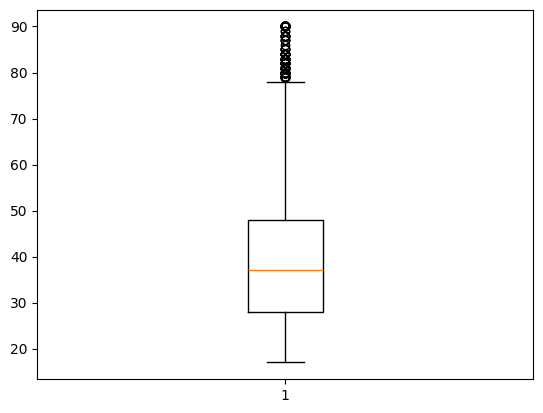

In [ ]:
# Remove Outlares
plt.boxplot(data['age']) # Sutabile For numerical values
plt.show()

# Top cicle represernt the outlayers in graph , 75-90 is the retarement period of people for our dataset these are the senior people
# center box give the maximum informataion in  the graph age 28-45 and yellow line show  median of the age

In [ ]:
# Remove Outlares

df = df[(df['age'] <= 75) & (df['age'] >=17)]

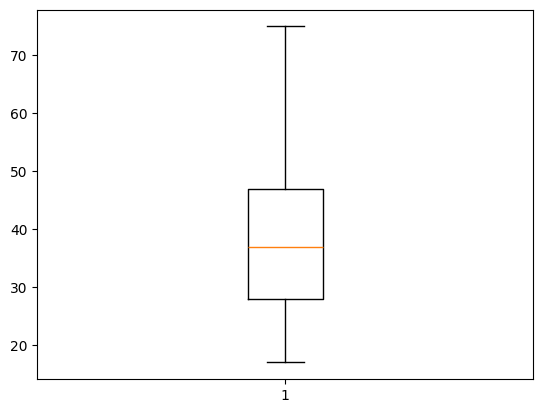

In [ ]:
plt.boxplot(df['age']) # Sutabile For numerical values
plt.show()

In [ ]:
df.shape

(48423, 15)

In [ ]:
# Remove redundancy
df.drop(columns=['education'],inplace = True)
# it show erroe becousse it is deleted form dataset after 1st run if  code

In [ ]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Other,103497,10,Never-married,Other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# as we know algorithum is mathamatical expression so it can not work on text data
# so we have to convert text columns data into numerical for that we will use encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass'])
df['gender'] = encoder.fit_transform(df['gender'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['marital-status'] = encoder.fit_transform(df['marital-status'])
df['native-country'] = encoder.fit_transform(df['native-country'])
df['race'] = encoder.fit_transform(df['race'])
df['relationship'] = encoder.fit_transform(df['relationship'])


In [ ]:
df


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,5,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,3,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,5,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,6,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,5,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [ ]:
# Split the data into X(independent data) and Y(dependent data)

In [ ]:
X = df.drop(columns=['income'])
Y = df['income']
X


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,5,3,2,1,0,0,40,39
1,38,3,89814,9,2,3,0,4,1,0,0,50,39
2,28,1,336951,12,2,10,0,4,1,0,0,40,39
3,44,3,160323,10,2,5,0,2,1,7688,0,40,39
4,18,2,103497,10,4,6,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39
48838,40,3,154374,9,2,5,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [ ]:
Y


,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [ ]:
# Scaler will conver the entire data in one range that is 0 to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 23,stratify = Y)


# X: This represents your independent variables, also known as features. It's the data you'll use to train your model to make predictions. In your case, X is the DataFrame df with the income column dropped, so it contains all the processed numerical features.

# Y: This is your dependent variable, or the target variable. It's what your model is trying to predict. Here, Y is the income column, which contains the labels (salary categories) that the model will learn to predict.

# test_size = 0.2: This parameter specifies the proportion of the dataset that will be used for the test set. A value of 0.2 (or 20%) means that 20% of your data will be allocated to the test set, and the remaining 80% will be used for the training set. The test set is crucial for evaluating how well your model generalizes to unseen data.

# random_state = 23: This is used for reproducibility. If you set random_state to any integer (like 23), the train_test_split will produce the same split every time you run the code. This is very important for debugging and ensuring that your results are consistent. Without it, the split would be random each time, making it hard to compare models or track changes.

# stratify = Y: This parameter ensures that the proportion of target variable (Y) categories is approximately the same in both the training and test sets as it is in the original dataset. For example, if 30% of your original income column has values '>50K', then stratify=Y will ensure that approximately 30% of the training set and 30% of the test set also have '>50K' incomes. This is especially important when dealing with imbalanced datasets to prevent one class from being over-represented or under-represented in either set, which could lead to biased model evaluation.
# Stratification works only for classification, not regression.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict = knn.predict(xtest)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8284976768198244

In [ ]:
print("Predicted:", predict)
print("Actual:   ", ytest.values)

Predicted: ['<=50K' '<=50K' '<=50K' ... '<=50K' '>50K' '<=50K']
Actual:    ['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(xtrain,ytrain)
predict1= reg.predict(xtest)
predict1


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
accuracy_score(ytest,predict1)

0.8271553949406298

In [ ]:
print("Predicted:", predict1)
print("Actual:   ", ytest.values)

Predicted: ['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']
Actual:    ['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']
